In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

2024-01-30 21:38:19.816093: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-30 21:38:19.835431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 21:38:19.835446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 21:38:19.835955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 21:38:19.839455: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_csv('train.dat', delimiter='\t', header=None)

In [3]:
df.head()

,0,1
0,-1,DVELDLVEISPNALP
1,-1,KADEELFNKLFFGT
2,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,-1,RDQMRARIADITGVAISRIA
4,-1,RKRLQLLLL


In [4]:
df_results = df[0]

In [5]:
df_results.columns = ['Labels']

In [6]:
df_results

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1561   -1
1562    1
1563    1
1564   -1
1565   -1
Name: 0, Length: 1566, dtype: int64

In [7]:
df_seq = df[[1]]

In [8]:
df_seq.columns = ['Sequence']

In [9]:
df_seq.head()

,Sequence
0,DVELDLVEISPNALP
1,KADEELFNKLFFGT
2,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
3,RDQMRARIADITGVAISRIA
4,RKRLQLLLL


In [10]:
# Assuming you have a function to load and preprocess your test dataset
# and your trained neural network 'nn' is available

# Load your test dataset
test_data = pd.read_csv('test.dat', delimiter='\t', header=None)
test_data.columns = ['Sequence']


In [11]:
df_seq.head()
df_seq.shape

(1566, 1)

In [12]:
test_data.shape

(392, 1)

In [13]:
def calculate_amino_acid_frequencies(sequences):
    amino_acids = 'ABCDEFGHIJKLMNOPQRSTUVWYZ'
    frequencies = np.zeros((len(sequences), len(amino_acids)))

    for i, sequence in enumerate(sequences):
        for aa in sequence:
            if aa in amino_acids:
                aa_index = amino_acids.index(aa)
                frequencies[i, aa_index] += 1

    return frequencies

# Example usage:
train_sequences = df_seq  # Replace with your actual training sequences
train_aa_frequencies = calculate_amino_acid_frequencies(train_sequences['Sequence'])

# Convert the frequencies to a numpy array or another suitable format for further processing
import numpy as np
train_freq_array = np.array(train_aa_frequencies)

In [14]:
train_freq_array.shape

(1566, 25)

In [15]:
X = train_freq_array
X.shape

(1566, 25)

In [16]:
df_results.shape

(1566,)

In [17]:
from imblearn.over_sampling import SMOTE

y = df_results

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [18]:
df_results.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: 0, dtype: int64

In [19]:
df_results.value_counts()

0
-1    1424
 1     142
Name: count, dtype: int64

In [20]:
df_resampled = pd.DataFrame(X_resampled)

In [21]:
df_resampled.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,1.0,2.0,0.0,6.0,4.0,2.0,0.0,0.0,...,0.0,0.0,5.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0
3,4.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,...,0.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# df_resampled.to_csv('features_resampled_dict_count.csv')
features_resampled = pd.DataFrame(y_resampled)
# features_resampled.to_csv('labels_resampled_dict_count.csv')

In [23]:
df_resampled.shape

(2848, 25)

In [24]:
y_resampled.shape

(2848,)

In [25]:
features_resampled.columns = ['Labels']

In [26]:
## Validation test creation
combined_df_resampled = pd.concat([df_resampled, features_resampled], axis= 1)
combined_df_resampled.shape

(2848, 26)

In [27]:
from sklearn.model_selection import train_test_split

df_resampled_train, df_resampled_val, label_resampled_train, label_resampled_val = train_test_split(df_resampled, features_resampled, test_size= 0.3, random_state=42)

In [28]:
print(df_resampled_train.shape)
print(df_resampled_val.shape)
print(label_resampled_train.shape)
print(label_resampled_val.shape)

(1993, 25)
(855, 25)
(1993, 1)
(855, 1)


In [29]:
label_resampled_train

,Labels
1650,1
1398,-1
1972,1
1725,1
1128,-1
...,...
1638,1
1095,-1
1130,-1
1294,-1


In [30]:
import torch
import torch.nn as nn

input_nodes = 25
hidden_nodes = 16   # Adjust as needed
output_nodes = 1
learning_rate = 0.08

# Define the neural network using Sequential
nn_pytorch = nn.Sequential(
    nn.Linear(input_nodes, hidden_nodes),  # Input layer to hidden layer
    nn.ReLU(),                             # ReLU activation for hidden layer
    nn.Linear(hidden_nodes, output_nodes), # Hidden layer to output layer
    nn.Sigmoid()                           # Sigmoid activation for output layer
)

optimizer = torch.optim.SGD(nn_pytorch.parameters(), lr=learning_rate, weight_decay=0.0)
loss_function = nn.BCELoss()

In [31]:
import torch
from torch.autograd import Variable

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(df_resampled_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor((label_resampled_train.values + 1) / 2, dtype=torch.float32).view(-1, 1)

# Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for i in range(len(X_train_tensor)):
        inputs = Variable(X_train_tensor[i])
        targets = Variable(y_train_tensor[i])

        # Forward pass
        outputs = nn_pytorch(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Average loss for this epoch
    epoch_loss /= len(X_train_tensor)
    losses.append(epoch_loss)

    # Print the loss for this epoch (optional)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

# Note: In PyTorch, no need to manually log the weights as in your original loop


Epoch 1/100, Loss: 0.21108465264201165
Epoch 2/100, Loss: 0.15240007362987365
Epoch 3/100, Loss: 0.12354056953244291
Epoch 4/100, Loss: 0.09134218066362326
Epoch 5/100, Loss: 0.07536410350352774
Epoch 6/100, Loss: 0.07212367730897393
Epoch 7/100, Loss: 0.05680249653858916
Epoch 8/100, Loss: 0.0542668130602724
Epoch 9/100, Loss: 0.04332206827553962
Epoch 10/100, Loss: 0.05157280407587374
Epoch 11/100, Loss: 0.03062873065376924
Epoch 12/100, Loss: 0.027690051938516435
Epoch 13/100, Loss: 0.02216547630142368
Epoch 14/100, Loss: 0.04658489214633303
Epoch 15/100, Loss: 0.06748062200899917
Epoch 16/100, Loss: 0.044986849832242076
Epoch 17/100, Loss: 0.0252340945339868
Epoch 18/100, Loss: 0.022820019898435573
Epoch 19/100, Loss: 0.027650734143605336
Epoch 20/100, Loss: 0.014861800111351985
Epoch 21/100, Loss: 0.013168909518963354
Epoch 22/100, Loss: 0.011990476352697585
Epoch 23/100, Loss: 0.010643191380169049
Epoch 24/100, Loss: 0.01076985887999944
Epoch 25/100, Loss: 0.006192716468758741
Ep

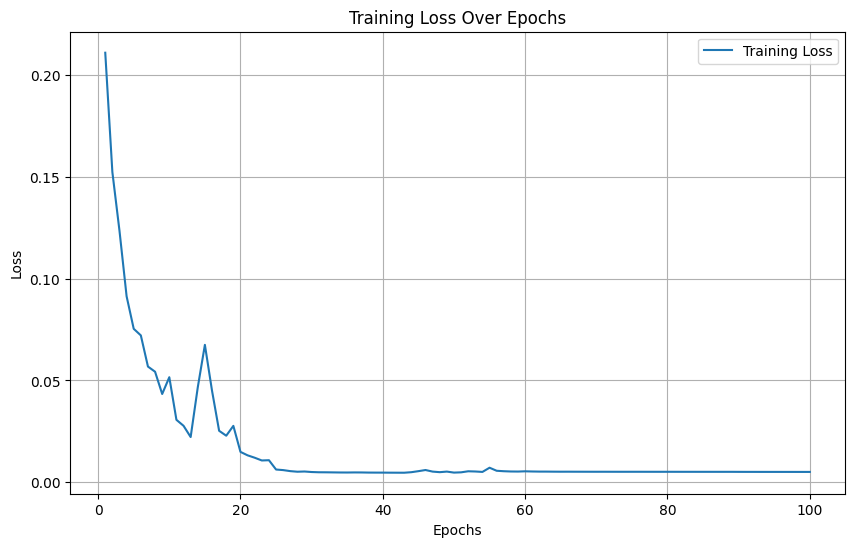

In [32]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

MCC on Validation Set: 0.9791648613863829


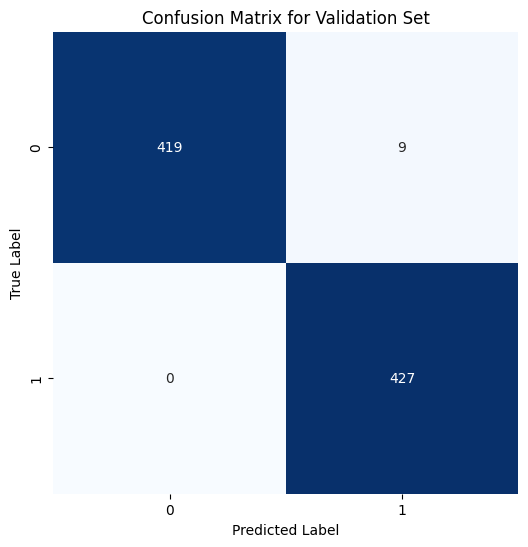

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch

def calculate_mcc(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate MCC
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = numerator / (denominator + np.finfo(float).eps)
    return mcc

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

def evaluate_pytorch_model(model, X_val, y_val):
    model.eval() 
    with torch.no_grad():
        if isinstance(X_val, pd.DataFrame):
            inputs = torch.tensor(X_val.values, dtype=torch.float32)
        else:
            inputs = X_val
        outputs = model(inputs)
        val_predictions = torch.round(outputs).squeeze().numpy()

    # Convert PyTorch tensors to NumPy arrays for MCC calculation
    y_val_np = y_val.cpu().numpy().flatten() if isinstance(y_val, torch.Tensor) else y_val
    val_predictions_np = val_predictions.cpu().numpy() if isinstance(val_predictions, torch.Tensor) else val_predictions


    mcc_score = calculate_mcc(y_val_np, val_predictions_np)
    return mcc_score, val_predictions

X_val_tensor = torch.tensor(df_resampled_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor((label_resampled_val.values + 1) / 2, dtype=torch.float32).view(-1, 1)

mcc_validation, val_predictions = evaluate_pytorch_model(nn_pytorch, X_val_tensor, y_val_tensor)
print(f"MCC on Validation Set: {mcc_validation}")


label_resampled_val_converted = ((label_resampled_val.values + 1) / 2).flatten()


if isinstance(label_resampled_val_converted, (pd.DataFrame, pd.Series)):
    label_resampled_val_converted = label_resampled_val_converted.values.flatten()

# Create the confusion matrix
cm = confusion_matrix(label_resampled_val_converted, val_predictions)

# Plot the confusion matrix
plot_confusion_matrix(cm, 'Confusion Matrix for Validation Set')


In [34]:
test_aa_frequencies = calculate_amino_acid_frequencies(test_data['Sequence'])
test_freq_array = np.array(test_aa_frequencies)

In [35]:
test_vectorized_df = pd.DataFrame(test_freq_array)
test_vectorized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,4.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0
1,4.0,0.0,0.0,4.0,3.0,1.0,3.0,0.0,1.0,0.0,...,2.0,1.0,2.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,...,1.0,1.0,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,...,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Assuming df_test is your test DataFrame and the preprocessing steps are done
X_test_tensor = torch.tensor(test_vectorized_df.values, dtype=torch.float32)

# Set the model to evaluation mode
nn_pytorch.eval()

# Perform a forward pass to get predictions
with torch.no_grad():
    test_outputs = nn_pytorch(X_test_tensor)
    test_predictions = torch.round(test_outputs).squeeze().numpy()  # Convert to binary predictions

# Convert predictions from 0 and 1 back to -1 and 1 if needed
test_predictions = (test_predictions * 2) - 1


In [38]:
test_predictions.shape

(392,)